In [2]:
# Decision trees models are of two types (CART). CA means Classification tress and RT means Regression Trees.
# Read the orange register to find out how DecisionTreeRegressor works.

In [6]:
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

In [7]:
sklearn.__version__

'0.22.2.post1'

In [8]:
%matplotlib inline

In [9]:
# The problem statement is same as PLR. We need to predict salary (DV) based on Level (IV).
# Again as relationship b/w Salary and Level is non-linear. If you draw a scatter graph (or see in PLR where its done
# already), you'll see the relationship curve.
dataset = pd.read_csv('MachineLearningAZ/Part2_Regression/Section8_DecisionTreeRegression/Python/Position_Salaries.csv')

In [10]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [11]:
# Separate DV (dependant variable) and IV (independant variables)
# You'll see below why we dont need 'Position' col
X = dataset.iloc[:, 1:-1].values  # IN ALL ML models, The features should always be a matrix, not a simple array
y = dataset.iloc[:, -1].values

In [12]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [13]:
# DecisionTree doesnt need FeatureScaling
from sklearn.tree import DecisionTreeRegressor

In [17]:
regressor = DecisionTreeRegressor(random_state=0)

In [18]:
regressor = regressor.fit(X, y)

In [19]:
# Predict
regressor.predict([[6.5]])

# A prediction of 150K is little bit off from that of SVR, PLR seen previously. That's because DecisionTreeRegressor
# is more adapted to multi feature dataset (like IRIS), not single feature dataset like here.

array([150000.])

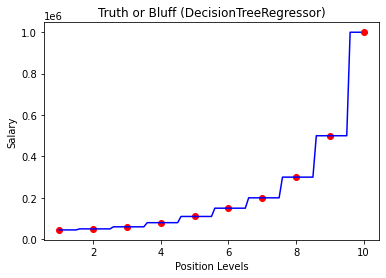

In [22]:
# Visualize
X_grid = np.arange(np.min(X), np.max(X), step=0.1)[:, np.newaxis]
plt.scatter(X, y, color='r')
# predictions
plt.plot(X_grid, regressor.predict(X_grid), color='b')
plt.title('Truth or Bluff (DecisionTreeRegressor)')
plt.xlabel('Position Levels')
plt.ylabel('Salary')
plt.show()

In [23]:
# not a good graph at all. What the regressor did is just predict the salary for level 5.5 to level 6.5 as the average
# of all the salaries for level 6

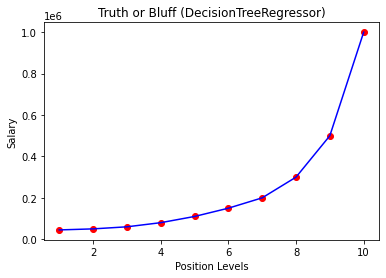

In [24]:
# Visualize in low resolution
plt.scatter(X, y, color='r')
# predictions
plt.plot(X, regressor.predict(X), color='b')
plt.title('Truth or Bluff (DecisionTreeRegressor)')
plt.xlabel('Position Levels')
plt.ylabel('Salary')
plt.show() # the graph doesnt make sense at all.